<a href="https://colab.research.google.com/github/imai-ry/colabo/blob/main/titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

タイタニック号沈没事故の生存者予測
kaggle tutorial

https://www.kaggle.com/c/titanic/submissions


https://www.randpy.tokyo/entry/python_random_forest

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/data/train.csv')
df.shape

(891, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


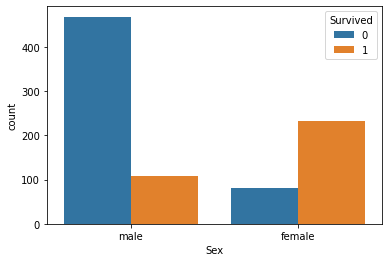

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot('Sex', hue='Survived', data=df)

In [69]:
# Fare, Ageの欠損値(NaN)は全乗客の平均で補完
# Embarkedは欠損値はSで補完
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

# カテゴリ変数（'Male', 'Female'など）を数値に変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q': 2})

In [70]:
from sklearn.model_selection import train_test_split

# 訓練データの準備
df = df.drop(['Cabin','Name','PassengerId','Ticket'], axis=1)
train_x = df.drop('Survived', axis=1)
train_y = df.Survived
(train_x, test_x, train_y, test_y) = train_test_split(train_x, train_y, test_size=0.3, random_state=666)

In [71]:
print(train_x.shape)
print(test_x.shape)

(623, 7)
(268, 7)


In [72]:
# 決定木学習
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_x, train_y)

In [78]:
# 結果の確認
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = clf.predict(test_x)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
print(f"auc: {auc(fpr, tpr)}")
print(f"accuracy_score: {accuracy_score(pred, test_y)}")

auc: 0.7837689688996596
accuracy_score: 0.7947761194029851


test.csvを読み込んで、kaggle提出用のcsvを出力する

すべての訓練データで決定木学習を行う

In [104]:
# 元データの読み込み
df = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/data/train.csv')

# 前処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q': 2})
df = df.drop(['Cabin','Name','PassengerId','Ticket'], axis=1)

# 学習
train_x = df.drop('Survived', axis=1)
train_y = df.Survived
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_x, train_y)

# test.csvの読み込み
tdf = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/data/test.csv')
print(tdf.shape)

# 前処理
tdf['Fare'] = tdf['Fare'].fillna(tdf['Fare'].median())
tdf['Age'] = tdf['Age'].fillna(tdf['Age'].median())
tdf['Embarked'] = tdf['Embarked'].fillna('S')
tdf['Sex'] = tdf['Sex'].apply(lambda x: 1 if x == 'male' else 0)
tdf['Embarked'] = tdf['Embarked'].map({'S':0, 'C':1, 'Q': 2})
pasid = tdf.PassengerId
tdf = tdf.drop(['Cabin','Name','PassengerId','Ticket'], axis=1)
print(tdf.shape)

# 予測
pred = clf.predict(tdf)

(418, 11)
(418, 7)


In [107]:
# csvの出力
print(pred.shape)
out = pd.DataFrame({'PassengerId':pasid, 'Survived': pred})
out.shape
out[0:4]
out.to_csv('/content/drive/MyDrive/kaggle/titanic/out.csv', index=False)

(418,)


テスト結果は0.71291で、公式が配布しているgendersubmission.csvの0.7655にすら勝てなかった